In [468]:
'''the overall desired coverage should be the total area of rectangular canvas, which is determined by user.
    as n gets large, the covered area will get closer to the desired coverage. In other words, for any fixed
    width and height of rectangular canvas, as n goes to infinity, the colored area will get closer to the 
    total area of the canvas.
    Below is the function of adding tower visualization, 
    with input of width and height of the rectangular canvas.
'''
def towers(width, height):
    #first draw the rectangle. Here I set the width and length to be both 10
    assert isinstance(width,int)
    assert isinstance(height,int)
    xmax = width
    ymax = height
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.patches as ptch
    import matplotlib.cm as cm
    from matplotlib.patches import Rectangle
    from matplotlib.collections import PatchCollection
    from random import randint
    from IPython import display
    import numpy as np
    plt.ylim(0,int(xmax))
    plt.xlim(0,int(ymax))
    n = 5 #number of communications
    patches = [Rectangle((0,0), 0, 0) for i in range(n)]
    x=[]
    y=[]
    w=[]
    h=[]
    for i in xrange(n):
        x.append(int(np.random.randint(xmax, size = 1))) #generate uniform variables for lower-left coordinate
        y.append(int(np.random.randint(xmax, size = 1)))
        w.append(int(np.random.randint(ymax, size = 1))+1) #generate uniform variables for width and height, avoiding zeroes
        h.append(int(np.random.randint(ymax, size = 1))+1)

        if (x[i] + w[i] > xmax): #make sure rectangles are within the region
            w[i] = xmax - x[i]
            if (y[i] + h[i] > ymax):
                h[i] = ymax - y[i]
        elif (y[i] + h[i] > ymax):
            h[i] = ymax - y[i]

        patches[i].set_x(x[i])
        patches[i].set_y(y[i])
        patches[i].set_width(w[i])
        patches[i].set_height(h[i])

        print "XY:%s, Width: %s, Height: %s" % (patches[i].get_xy(), patches[i].get_width(), patches[i].get_height())
        print "__________________________________"   
        plt.close()
        fig, ax = plt.subplots()
        ax.set_xlim(0,xmax)
        ax.set_ylim(0,ymax)
        rect1 = ptch.Rectangle((x[0],y[0]), w[0],h[0], color='Blue',alpha=0.5)
        ax.add_patch(rect1)
        plt.title('Starts Here')
        for j in range(i): #adding new rectangles randomly,may have intersections
            p = ptch.Rectangle((x[j+1],y[j+1]),w[j+1],h[j+1], color=np.random.rand(3,),alpha=0.5)
            ax.add_patch(p)
            plt.title('New Tower Enters')

            if x[j] in range(x[j-1],x[j-1]+w[j-1]): #check if trimming is needed
                if y[j] in range(y[j-1], y[j-1]+h[j-1]):
                    if w[j]>h[j]:
                        x[j] = x[j-1]+w[j-1]
                    else:
                        y[j] = y[j-1]+h[j-1]
                plt.title('New Tower is Trimmed')
        plt.show(block=False)
    print x,y,w,h
    print x[0]

XY:(3, 4), Width: 6, Height: 3
__________________________________


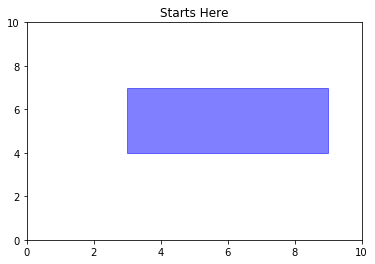

XY:(3, 4), Width: 3, Height: 2
__________________________________


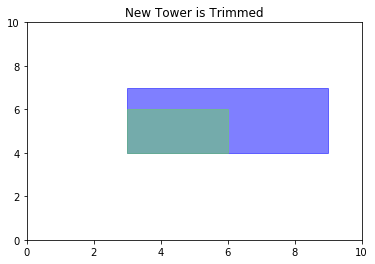

XY:(1, 0), Width: 2, Height: 10
__________________________________


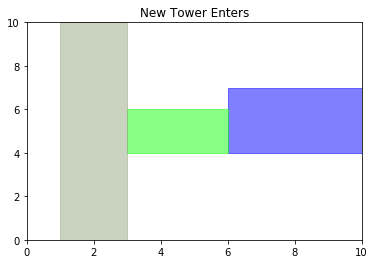

XY:(8, 7), Width: 1, Height: 3
__________________________________


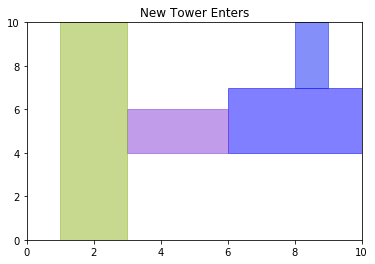

XY:(3, 8), Width: 1, Height: 2
__________________________________


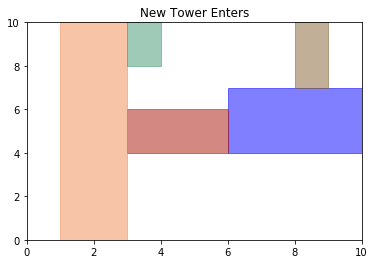

[6, 3, 1, 8, 3] [4, 4, 0, 7, 8] [6, 3, 2, 1, 1] [3, 2, 10, 3, 2]
6


In [469]:
towers(10,10)